In [1]:
# only adjust settings in this cell
state = 'MS'
k = 4                 # the state has this number of districts
enumeration_limit = 10

In [2]:
filepath = 'C:\\districting-data-2020-reprojection\\'
filename = state + '_county.json'

from read import read_graph_from_json
G = read_graph_from_json( state, filepath + filename) 
k = G._k

In [3]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / k
print(f"When k = {k}, ideal_population = {round(ideal_population,2)}.")

When k = 4, ideal_population = 740319.75.


In [4]:
from optimization import iterative_refinement
from math import ceil, floor
import time

deviation = 1/2
max_deviation = 0.01 * ideal_population
plans = list()

while True:

    print("*****************************************")
    print(f"Trying deviation = {deviation}.")
    print("*****************************************")
    
    L = ceil( ideal_population - deviation )
    U = floor( ideal_population + deviation )

    start_time = time.perf_counter()
    plans += iterative_refinement(G, L, U, k, enumeration_limit=enumeration_limit, verbose=False)
    print("Total time =",round(time.perf_counter() - start_time,2))

    if deviation == max_deviation:
        break
    
    deviation *= 2
    deviation = min( deviation, max_deviation )
       

*****************************************
Trying deviation = 0.5.
*****************************************
Set parameter Username
Academic license - for non-commercial use only - expires 2026-04-01
Total time = 0.03
*****************************************
Trying deviation = 1.0.
*****************************************
Total time = 6077.28
*****************************************
Trying deviation = 2.0.
*****************************************
Total time = 7387.41
*****************************************
Trying deviation = 4.0.
*****************************************
Total time = 10427.19
*****************************************
Trying deviation = 8.0.
*****************************************
Total time = 8840.72
*****************************************
Trying deviation = 16.0.
*****************************************
Total time = 4716.34
*****************************************
Trying deviation = 32.0.
*****************************************
Total time = 3763.7
*******

***************************************
obj_type = cut_edges
***************************************
Pareto front objective values: [[0.75, 116], [2.25, 110], [7.25, 108], [11.25, 102], [11.75, 100], [15.75, 98], [21.75, 96], [31.75, 92], [48.75, 86], [119.75, 82], [143.75, 80], [289.25, 78], [643.25, 76], [1394.75, 74], [1394.75, 74], [1785.75, 72], [1785.75, 72], [1785.75, 72], [1785.75, 72], [1785.75, 72], [2620.25, 70], [3081.25, 68], [3081.25, 68], [4035.25, 64], [7349.25, 62]]


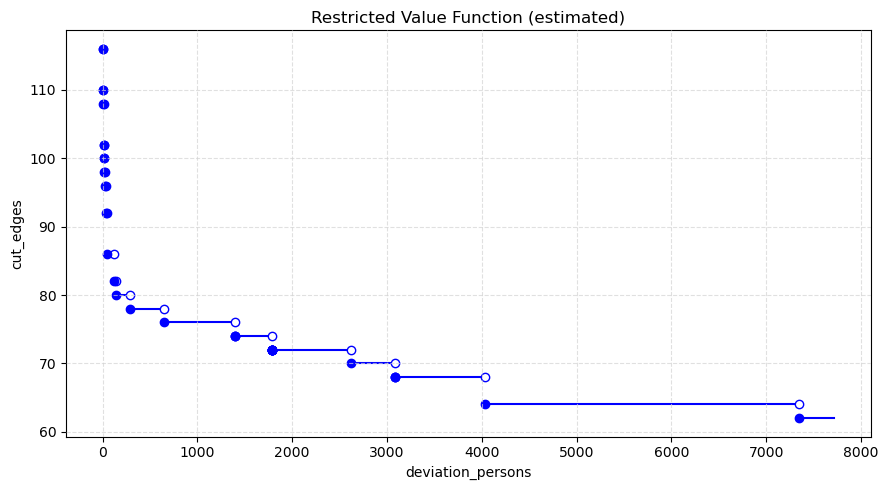

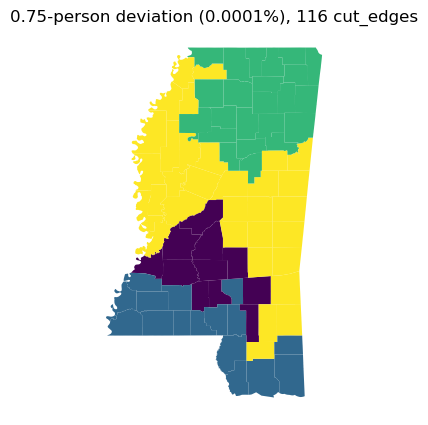

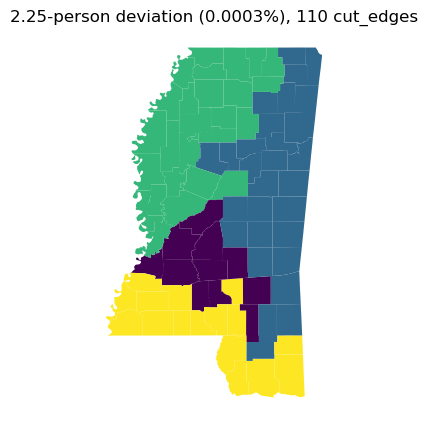

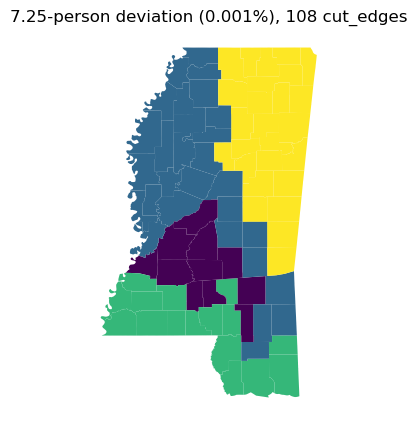

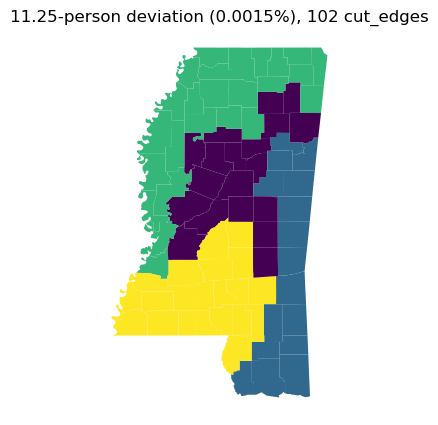

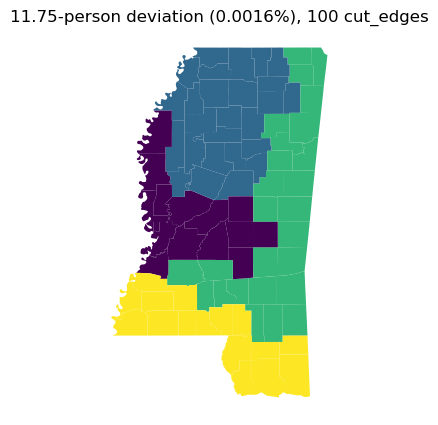

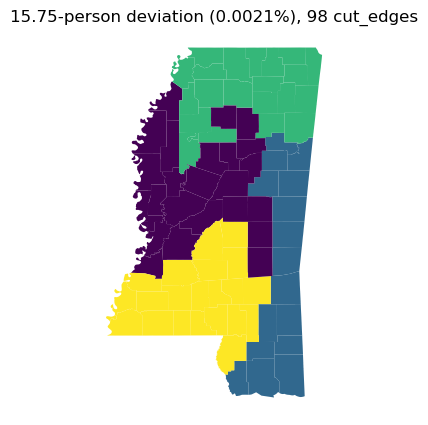

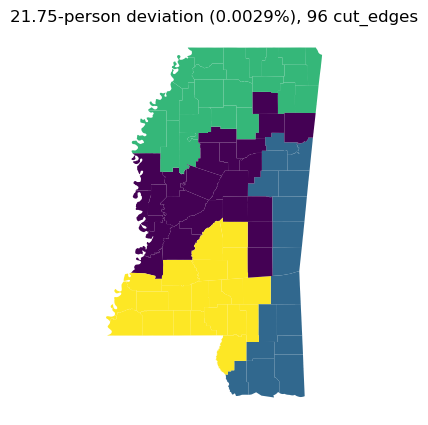

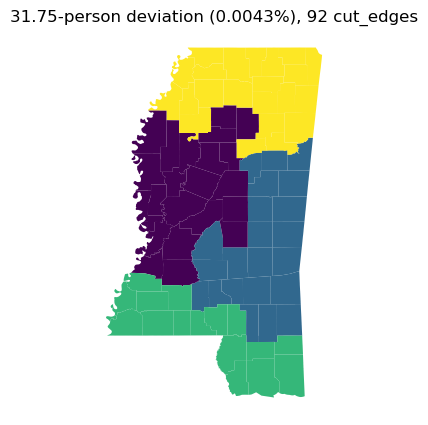

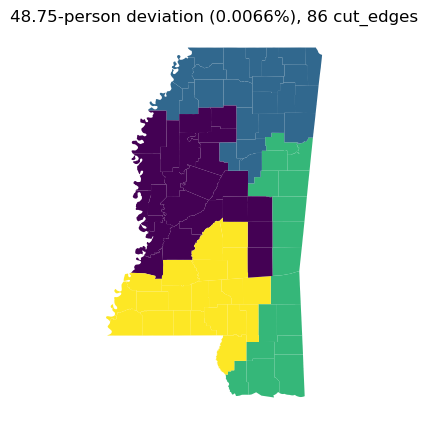

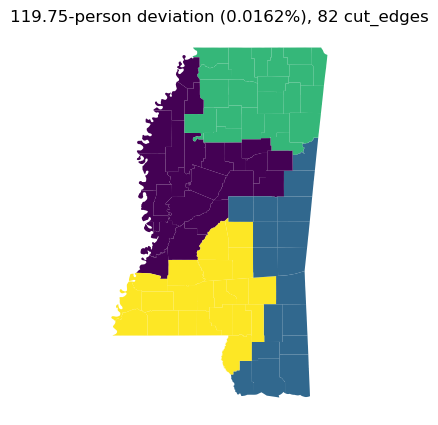

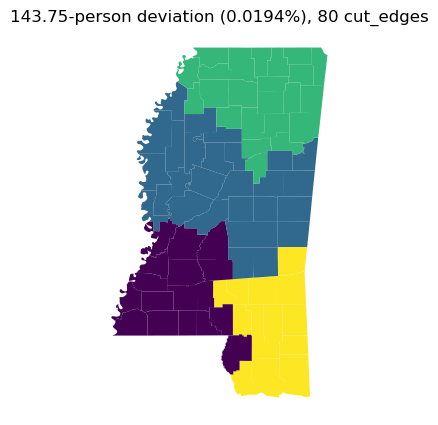

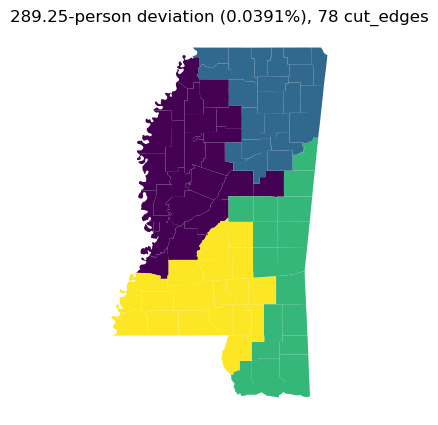

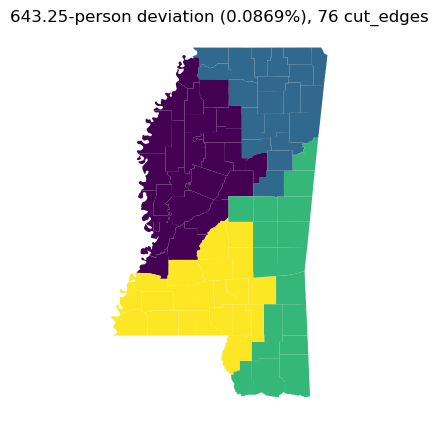

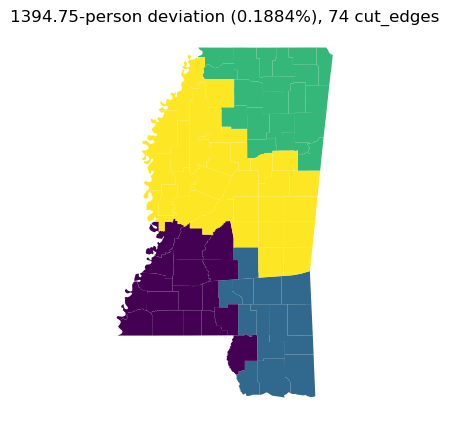

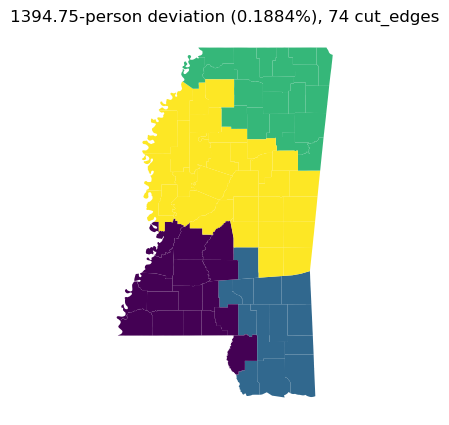

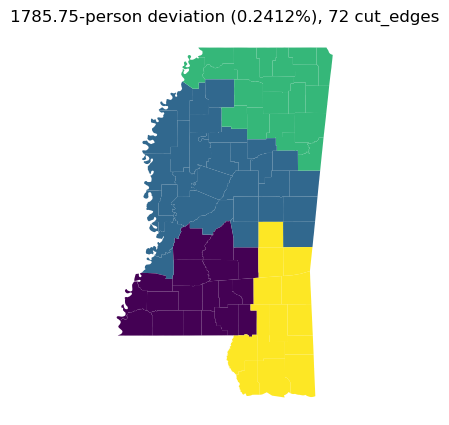

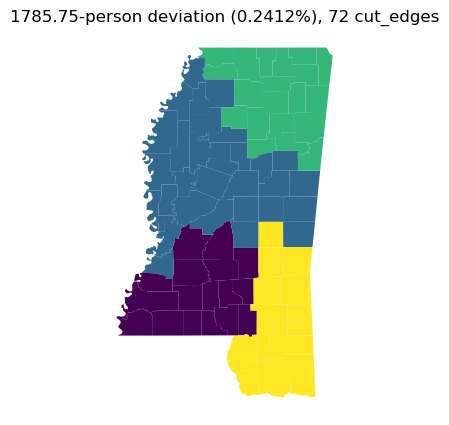

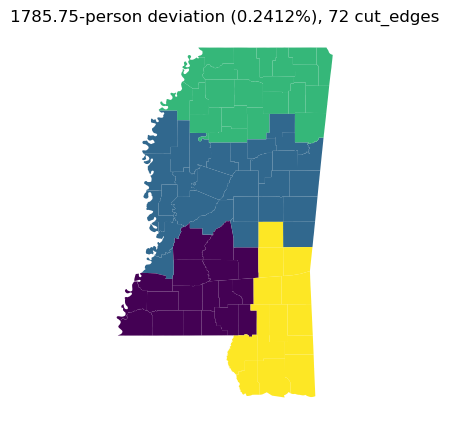

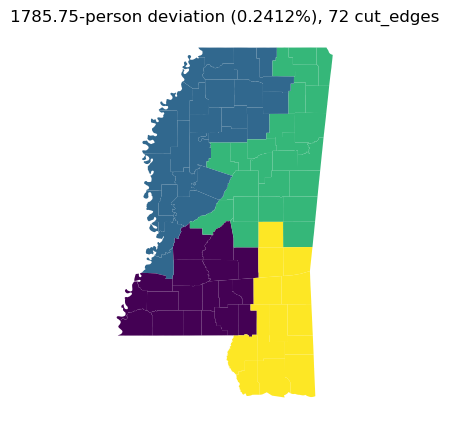

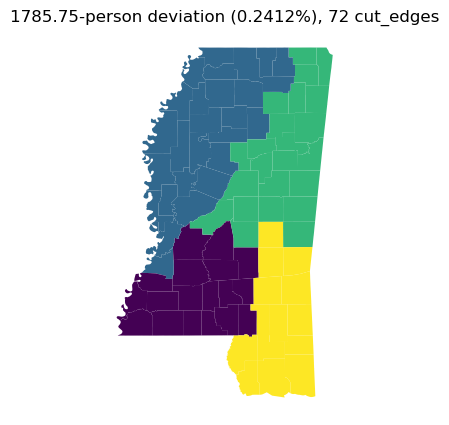

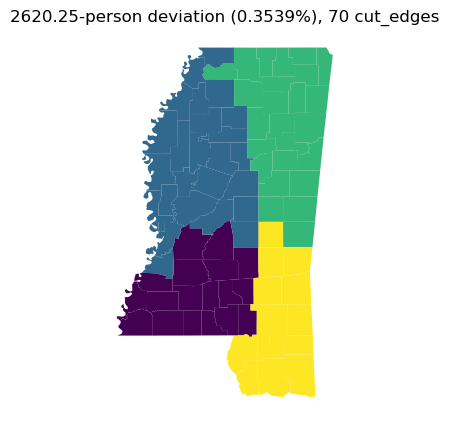

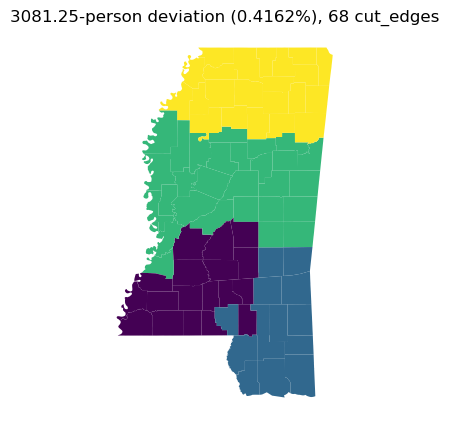

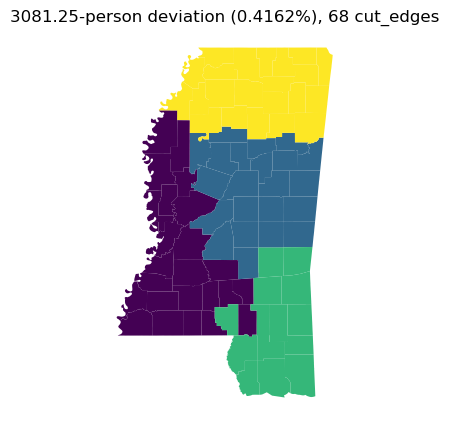

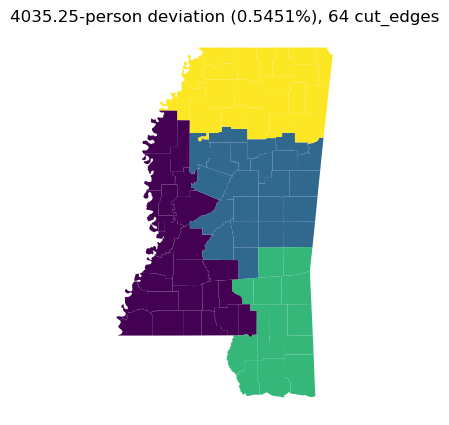

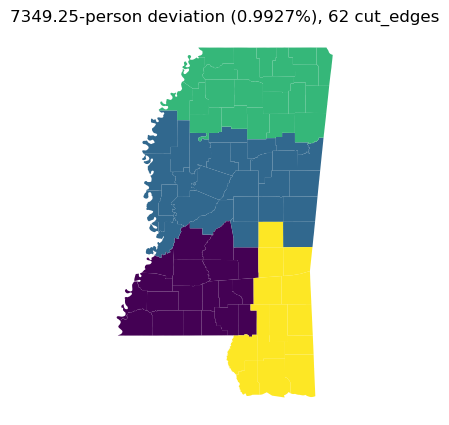

***************************************
obj_type = perimeter
***************************************
Pareto front objective values: [[0.75, 63.3153336691774], [2.25, 59.630139646417426], [4.25, 59.465386706880494], [8.25, 58.58704664177581], [11.25, 58.38687568981709], [11.75, 54.293141966457036], [20.25, 54.009611012202306], [31.75, 53.93519162362684], [46.25, 53.757352149367144], [47.75, 53.52890113303003], [48.75, 53.145476607461376], [60.75, 52.27771141398165], [70.25, 51.41837335556872], [75.25, 50.81969508037197], [124.25, 50.10810232946457], [217.75, 49.827563148929535], [299.25, 49.14665702176052], [467.75, 48.820093607585825], [599.75, 48.550789346585596], [1141.75, 47.74280966700675], [1785.75, 47.46951168348784], [2263.75, 47.303775288379796], [2412.25, 46.919139162959596], [3702.75, 46.854428440867785], [3774.75, 46.08430167197268], [4032.75, 45.74258442877493], [4152.75, 45.72210151498467]]


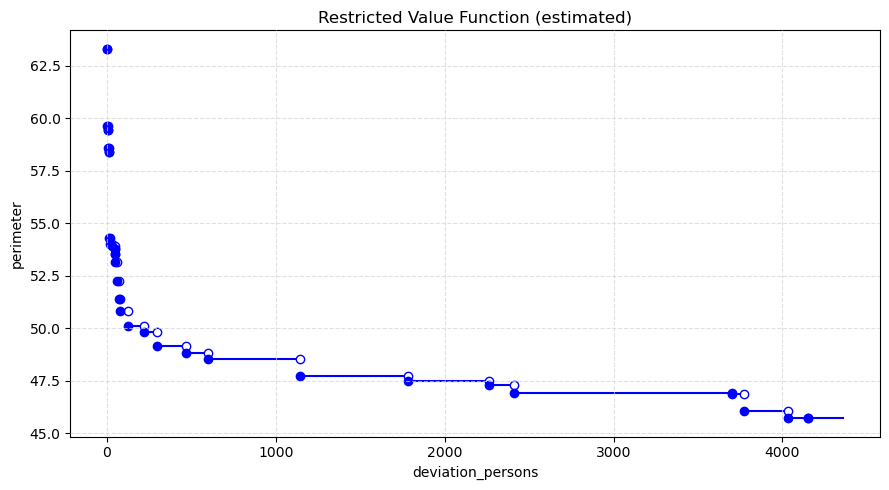

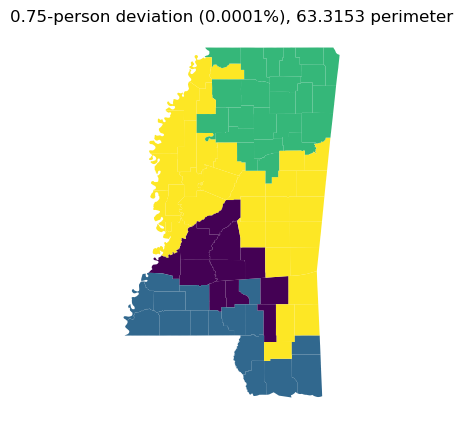

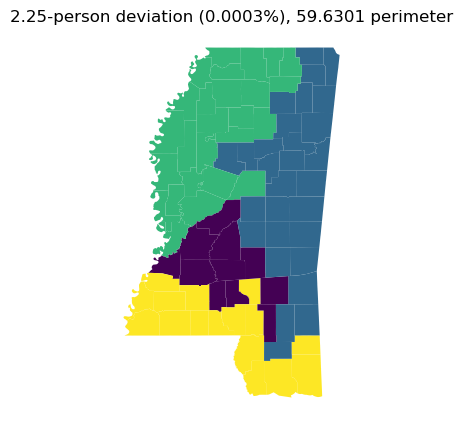

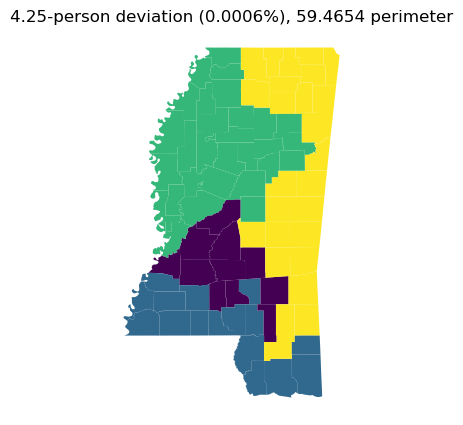

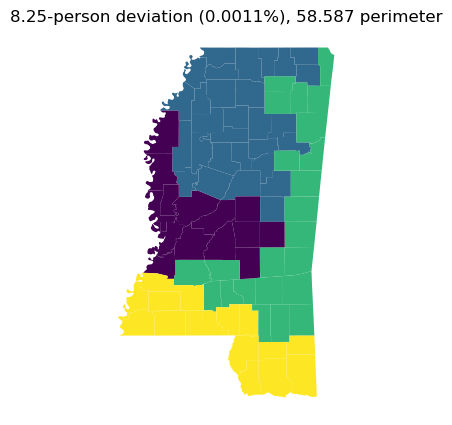

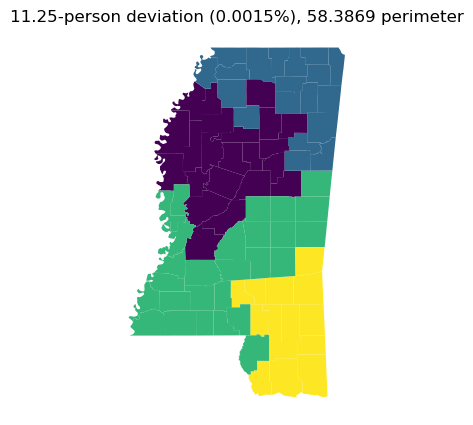

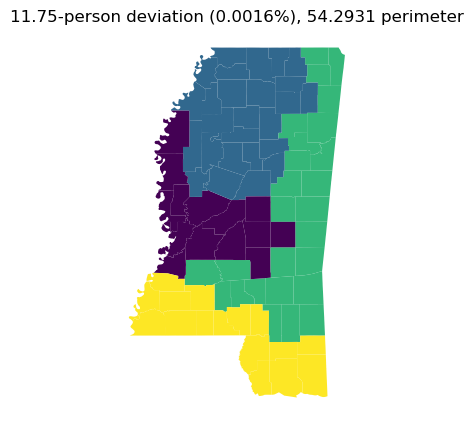

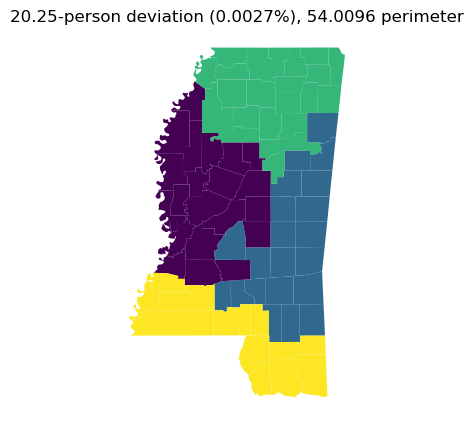

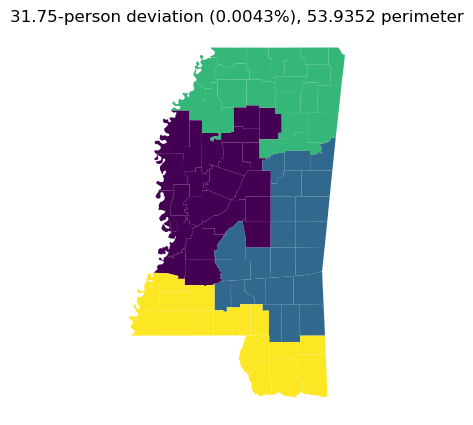

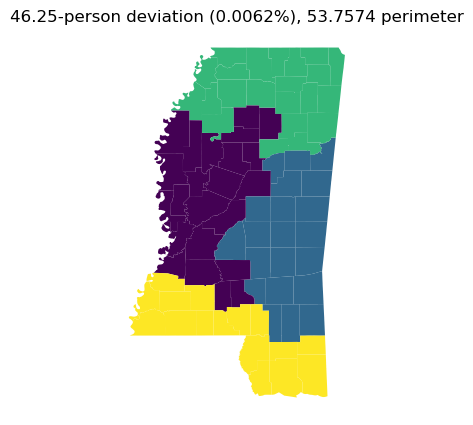

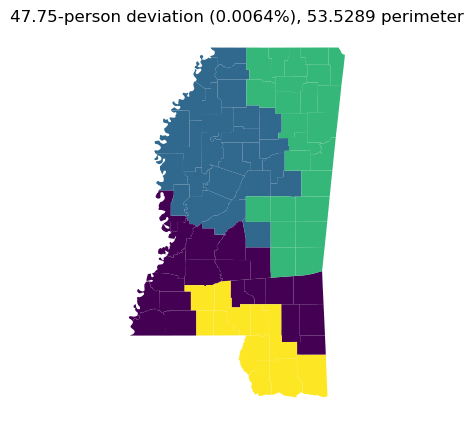

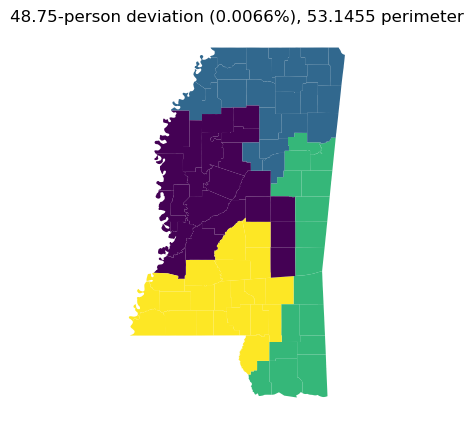

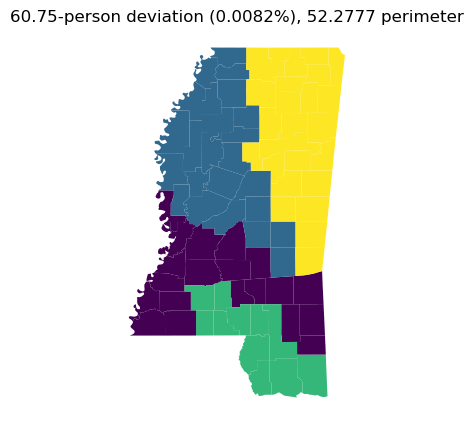

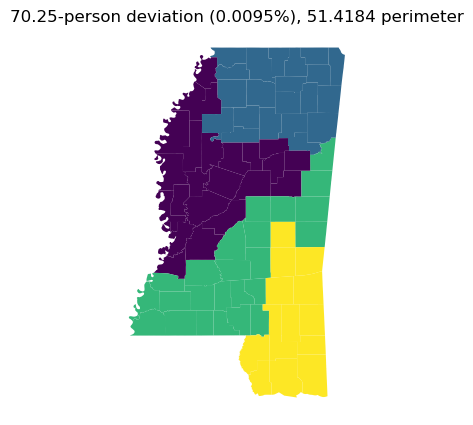

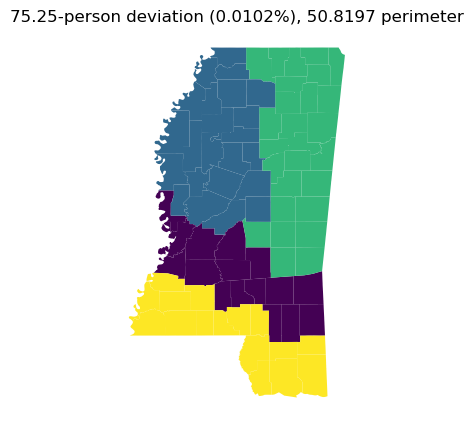

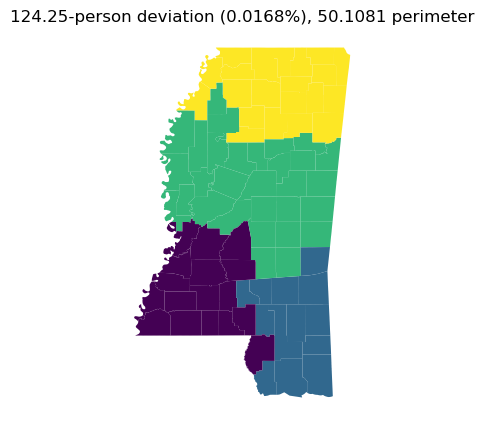

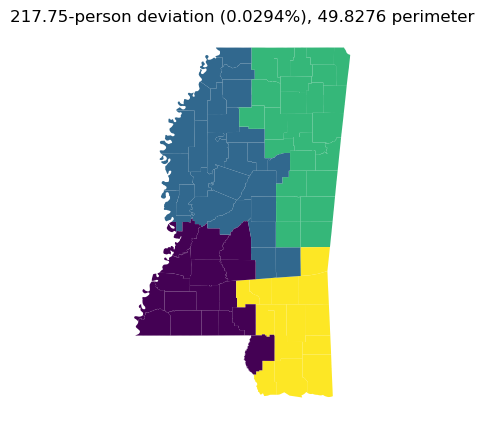

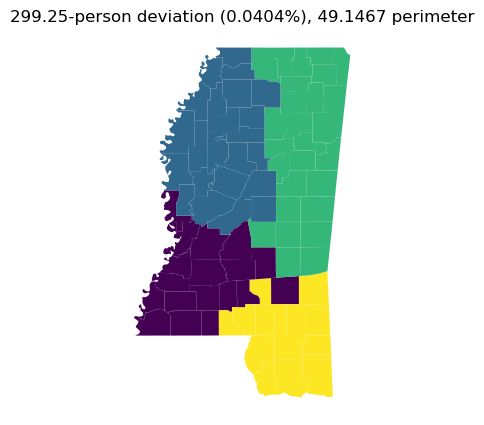

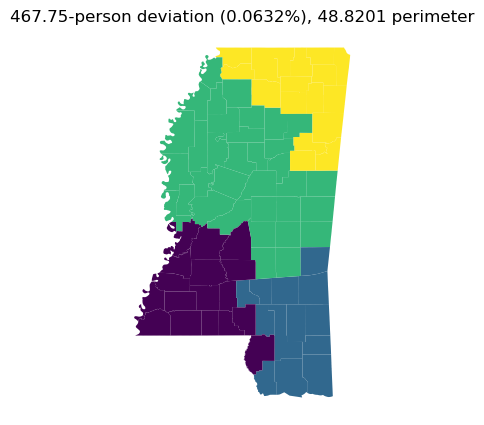

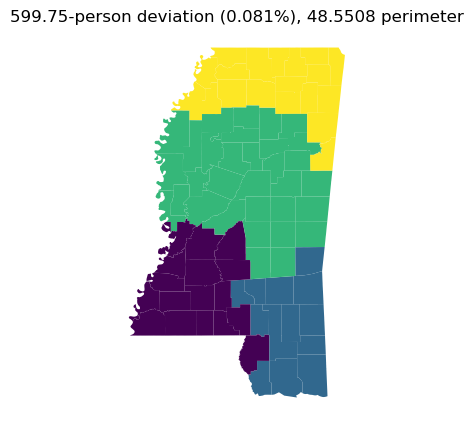

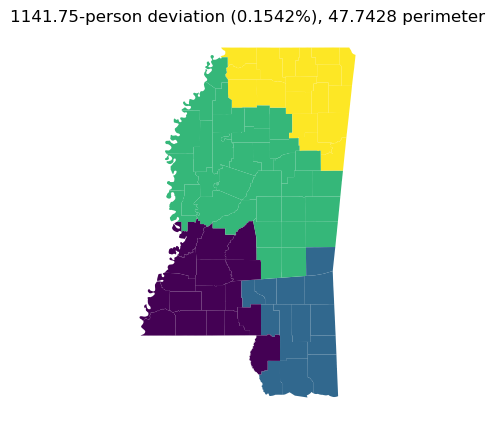

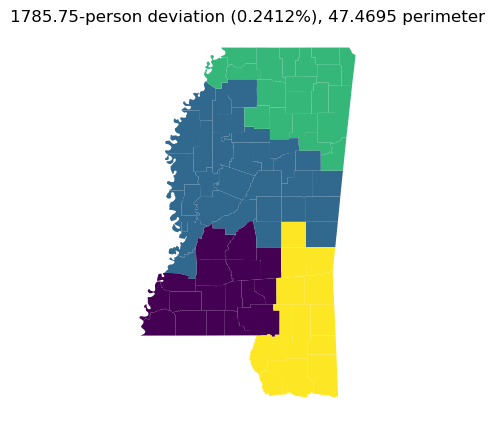

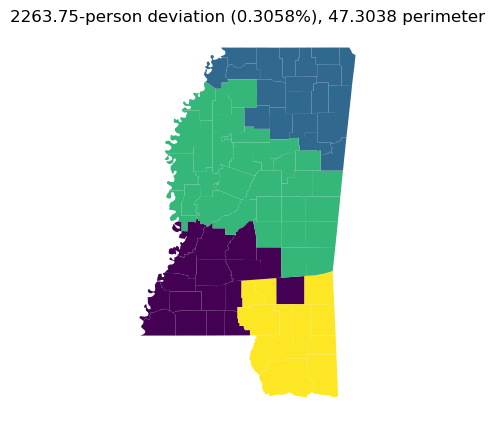

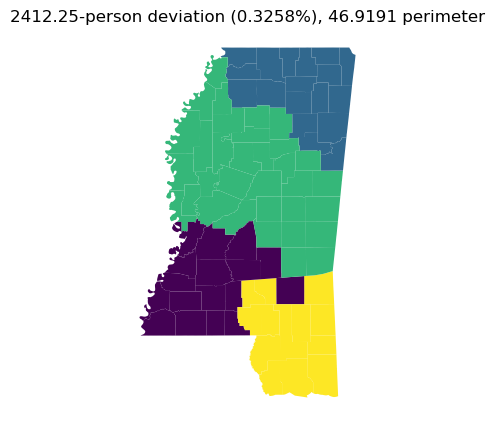

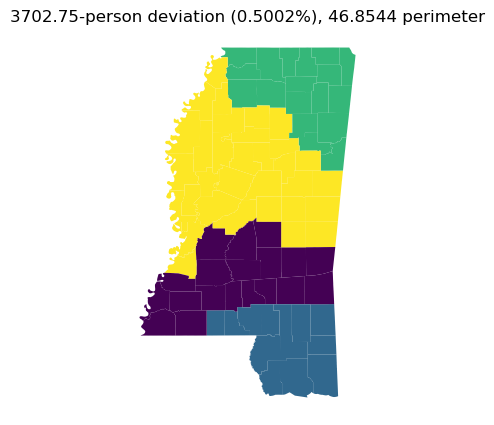

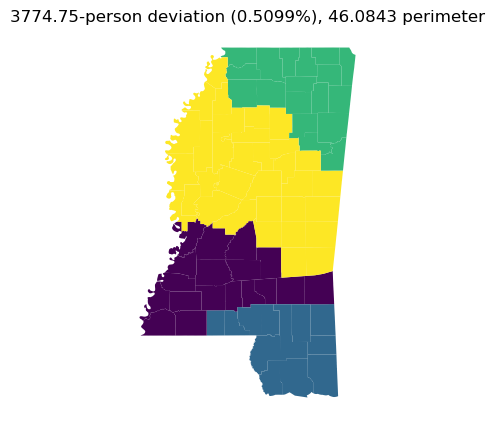

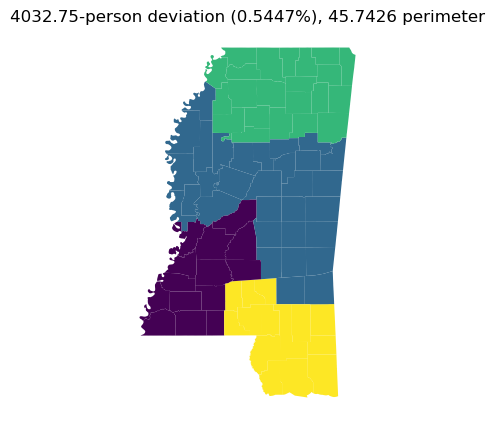

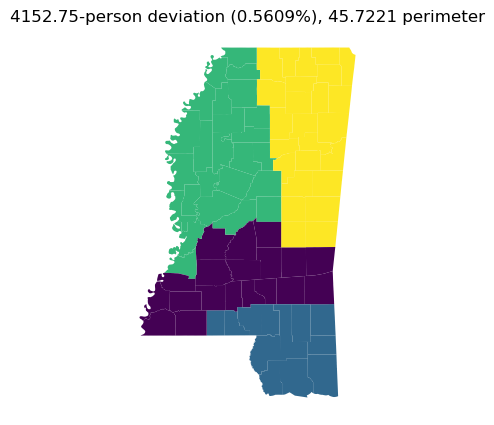

***************************************
obj_type = inverse_Polsby_Popper
***************************************
Pareto front objective values: [[0.75, 6.567453510457687], [2.25, 5.87030080850058], [4.25, 5.794769647513835], [8.25, 5.627012416556116], [11.25, 5.462424418299557], [11.75, 4.943386221737275], [20.25, 4.707615536592472], [31.75, 4.669013131220022], [48.75, 4.499937471716875], [70.25, 4.333340736912136], [75.25, 4.290657366788164], [124.25, 4.09389732374947], [220.75, 4.083560935119788], [299.25, 3.993017899736744], [340.75, 3.9747327570584954], [467.75, 3.9123095069921683], [654.75, 3.9054720972348145], [1016.75, 3.863822442132123], [1141.75, 3.7556624431055825], [1785.75, 3.578331223486687], [2607.75, 3.543435416619089], [2996.25, 3.530544665202873], [3468.75, 3.498682491334061], [3702.75, 3.490896226457691], [3774.75, 3.4297520438020213], [4032.75, 3.404142440925431]]


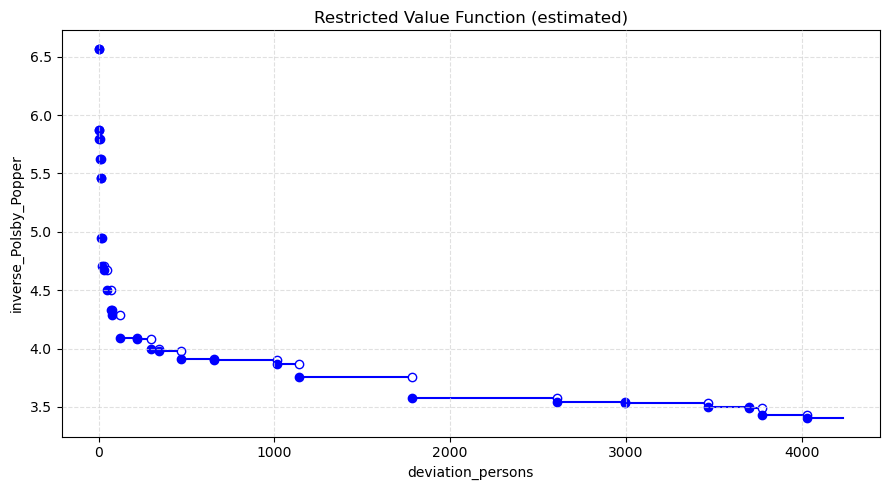

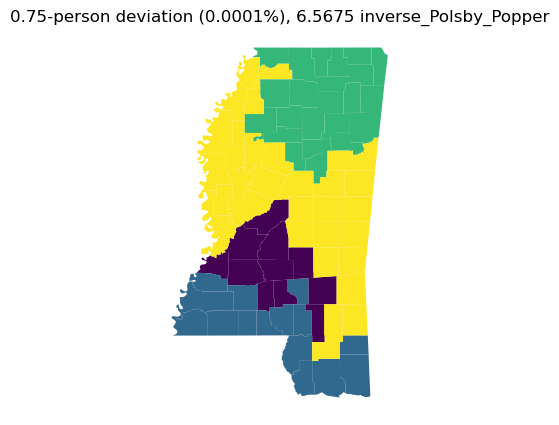

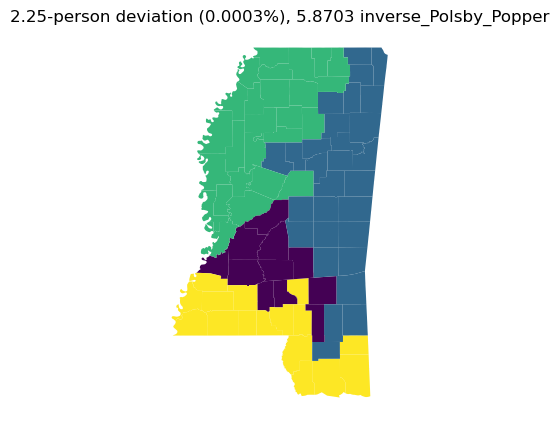

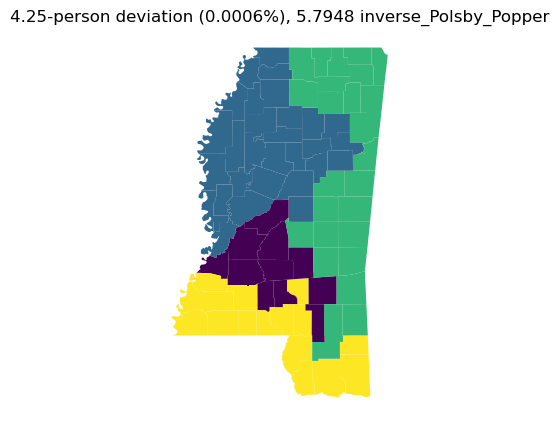

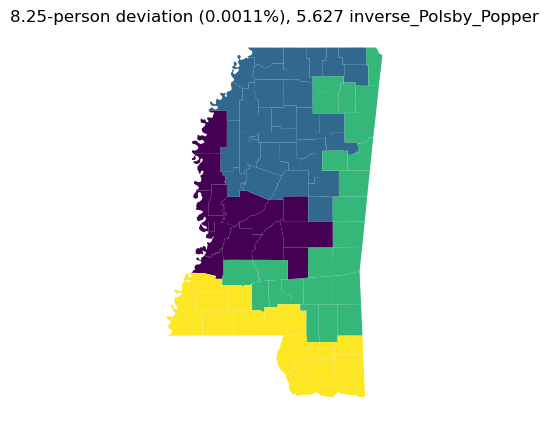

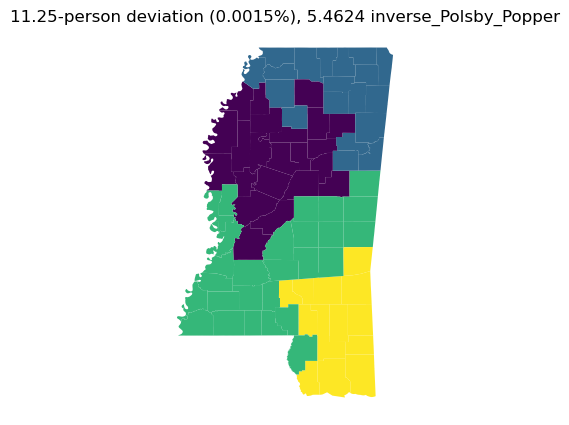

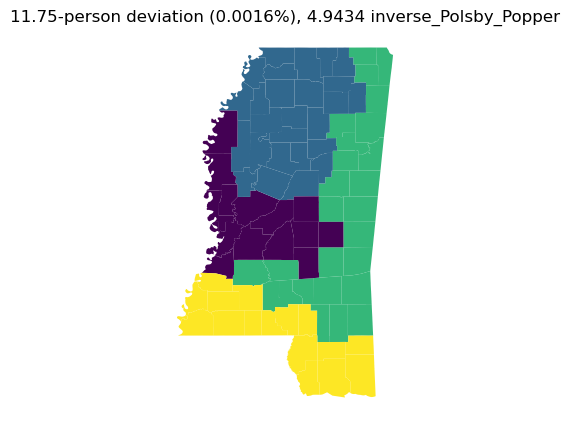

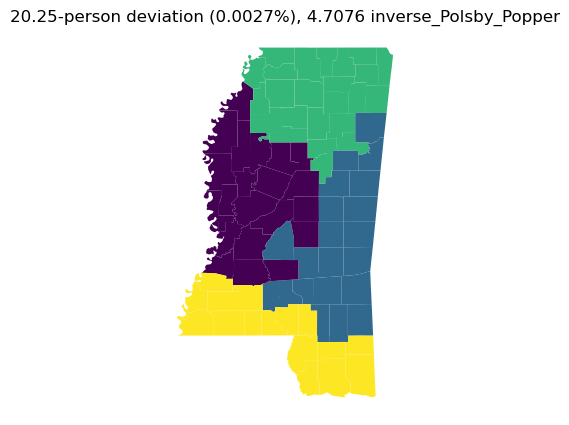

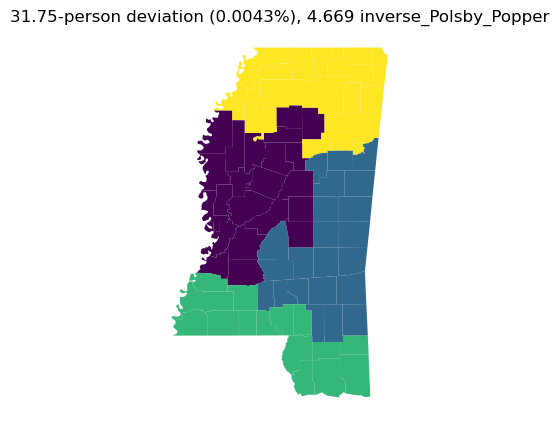

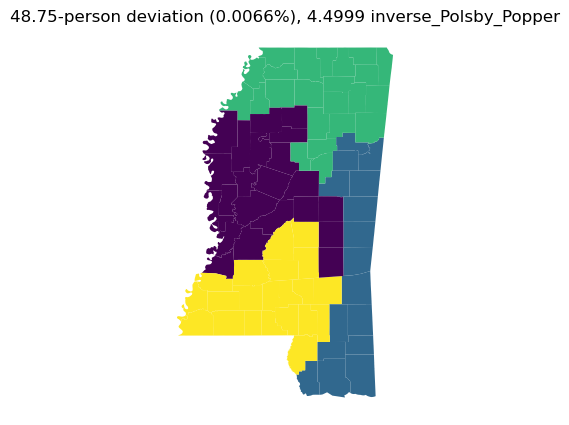

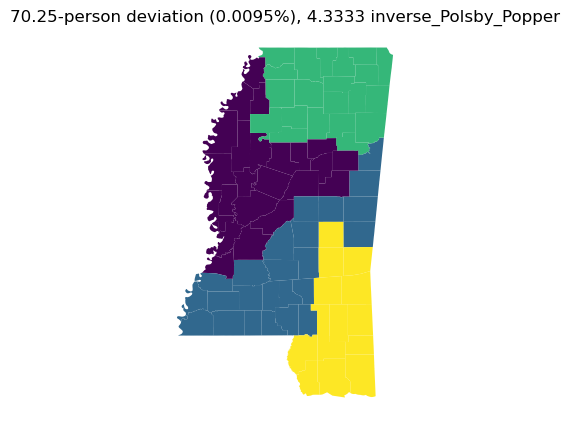

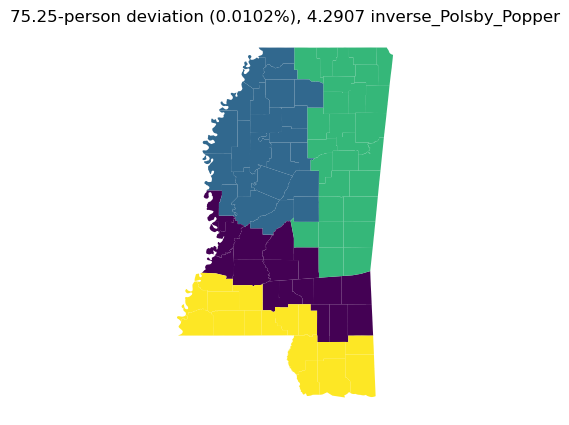

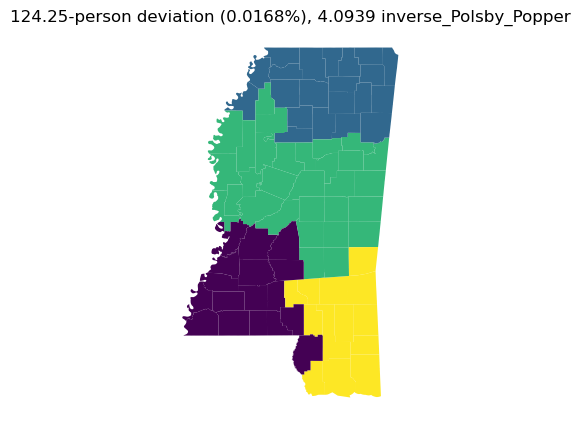

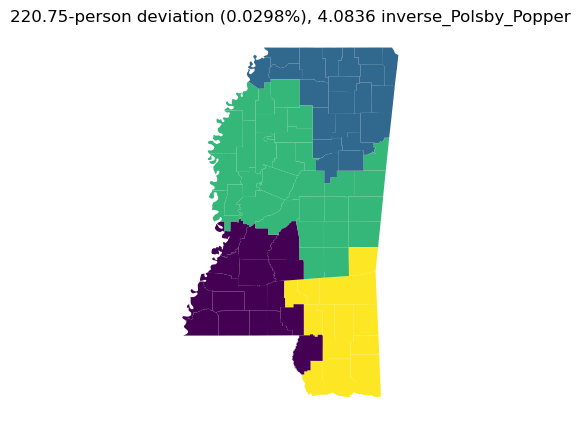

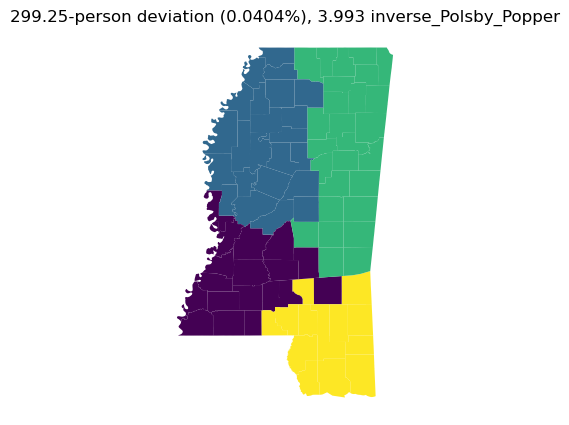

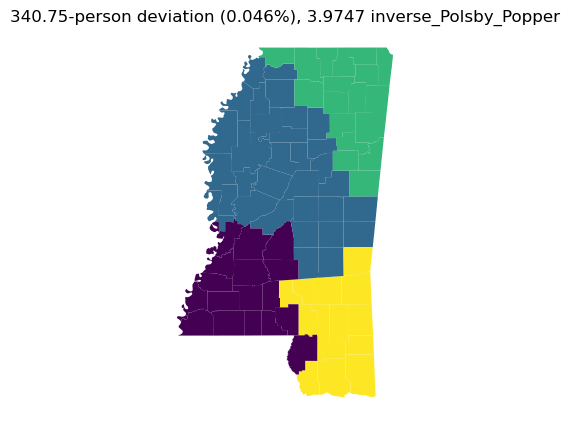

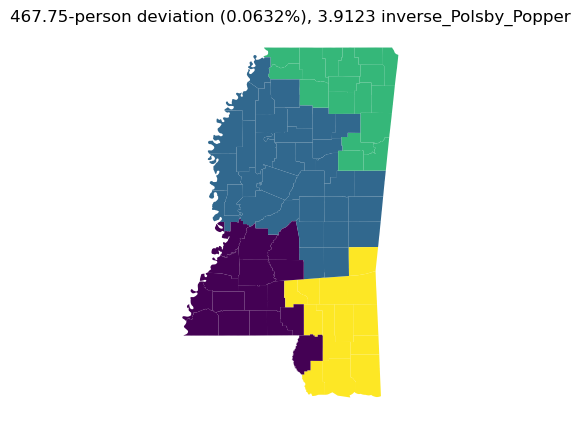

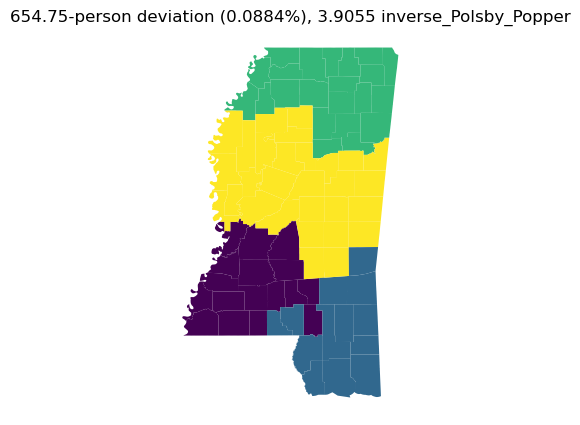

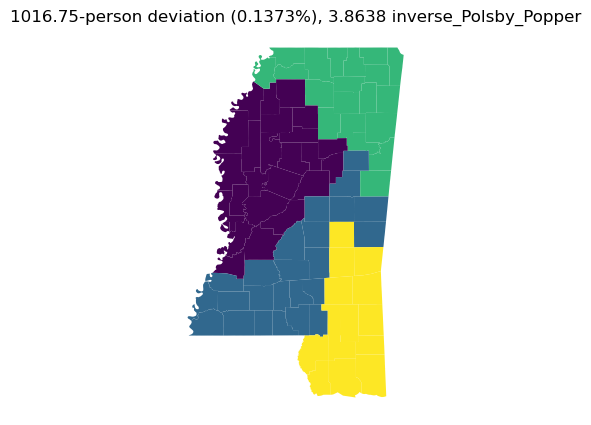

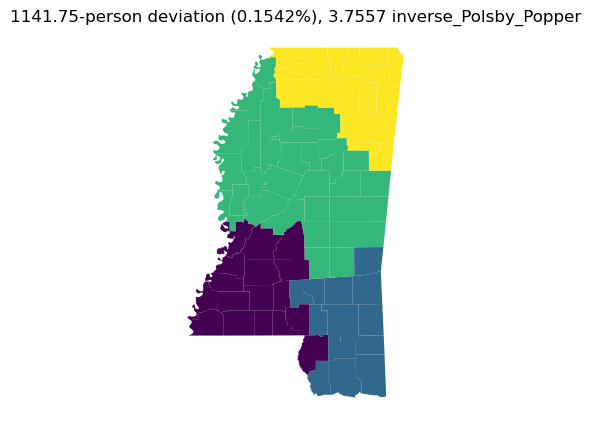

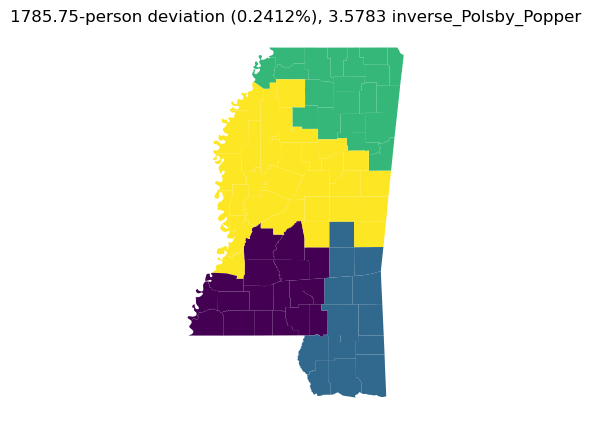

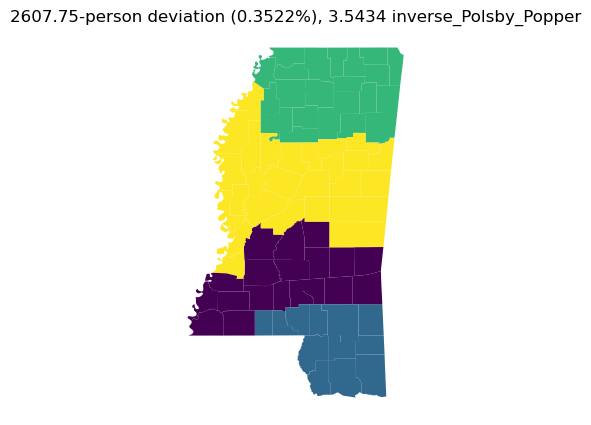

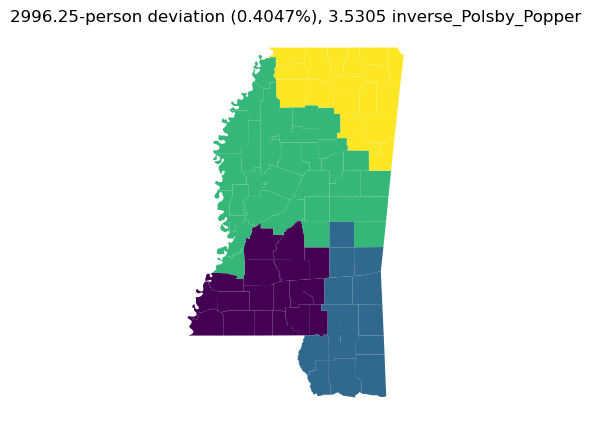

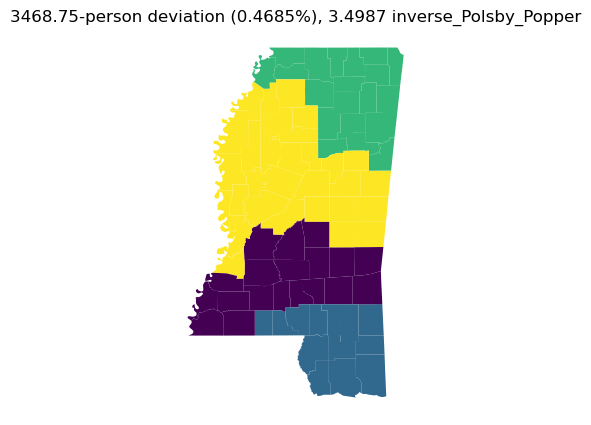

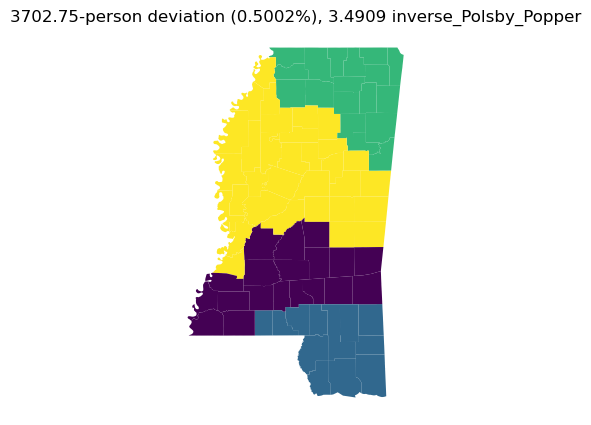

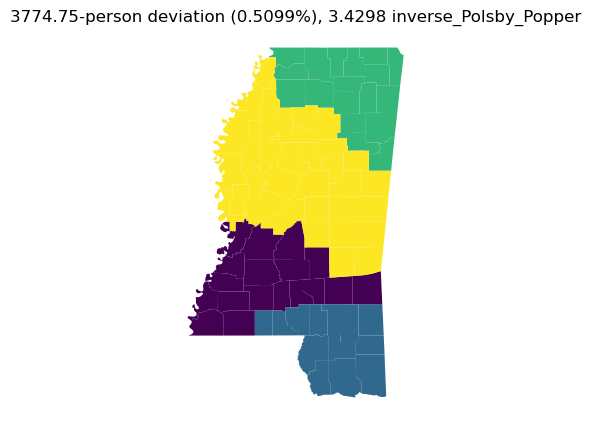

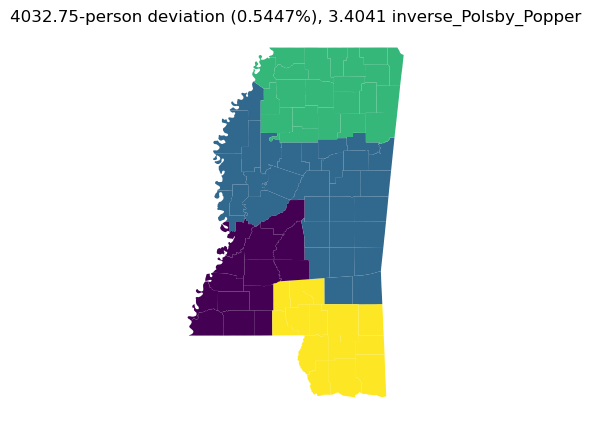

***************************************
obj_type = average_Polsby_Popper
***************************************
Pareto front objective values: [[0.75, 0.18757768922138915], [1.75, 0.1876507172181936], [6.75, 0.20529789544509813], [7.25, 0.21858307979739539], [9.25, 0.22002769643044798], [11.25, 0.2383571751929226], [12.75, 0.2752143407951064], [13.25, 0.2802350639788473], [14.75, 0.28096363181672673], [30.75, 0.2928733396373647], [53.75, 0.2935877298334748], [57.25, 0.29371859572575243], [70.25, 0.3084729126329265], [79.75, 0.3278271183033418], [195.75, 0.32907327707380735], [344.25, 0.3358696356119815], [1729.25, 0.3444575049565255], [3739.25, 0.3585274668537176]]


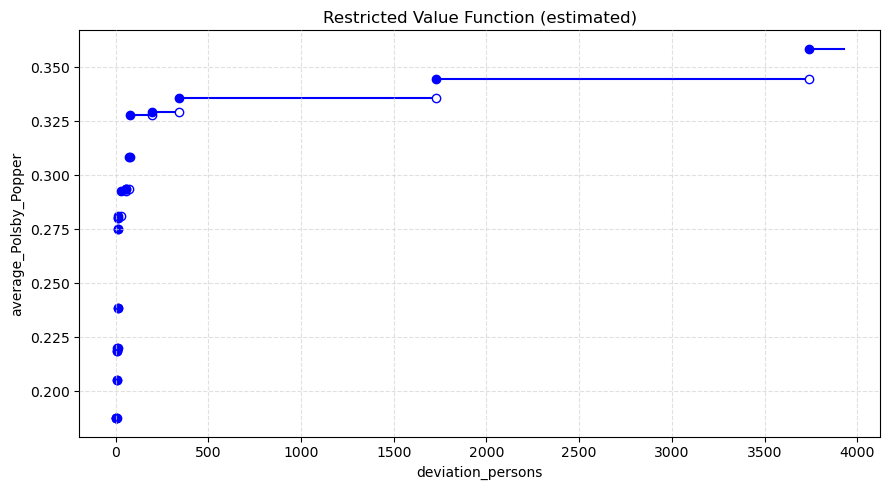

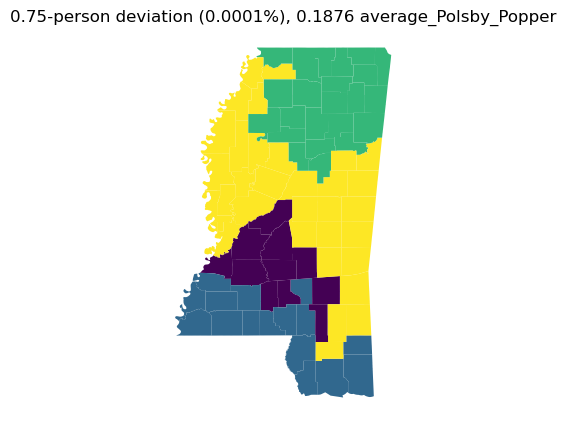

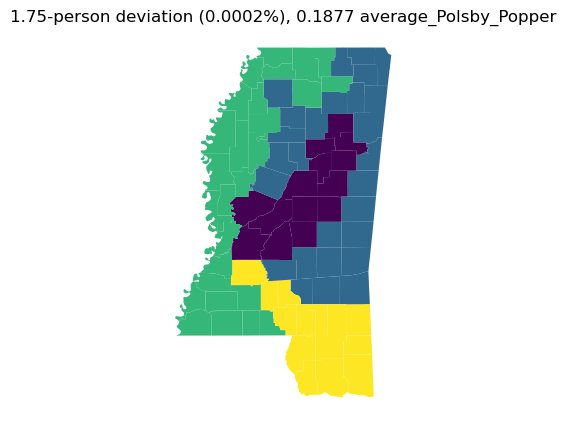

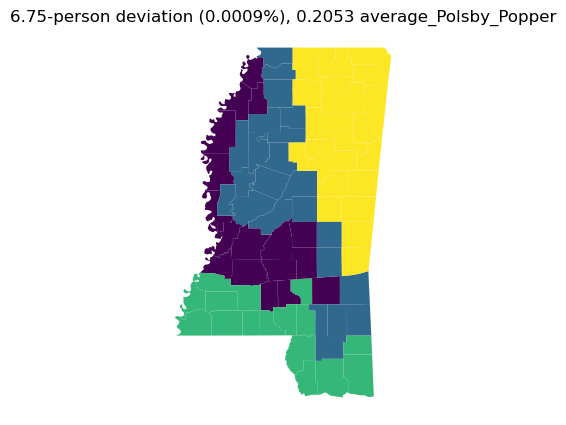

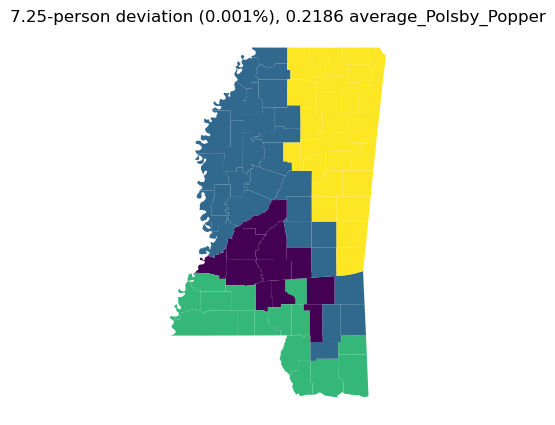

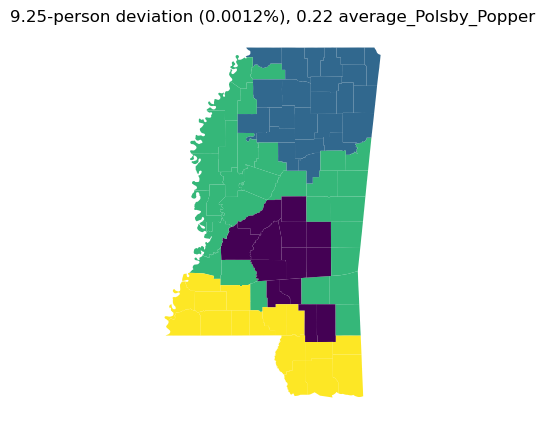

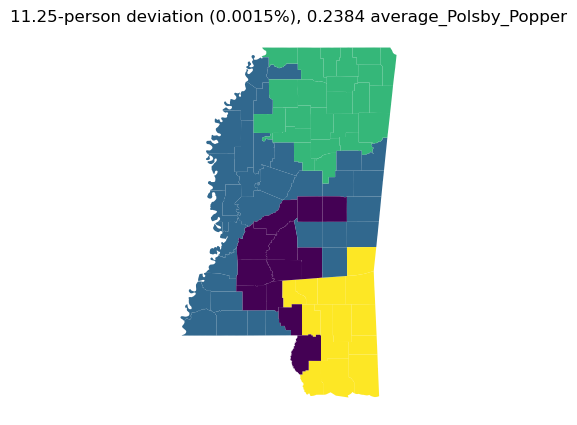

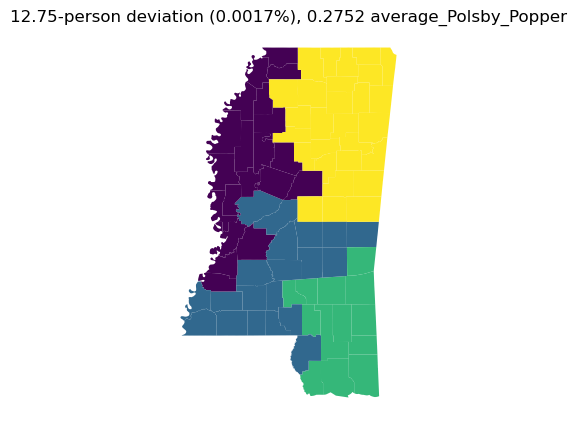

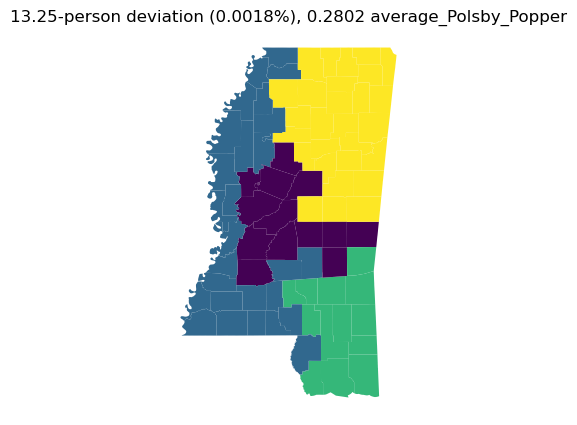

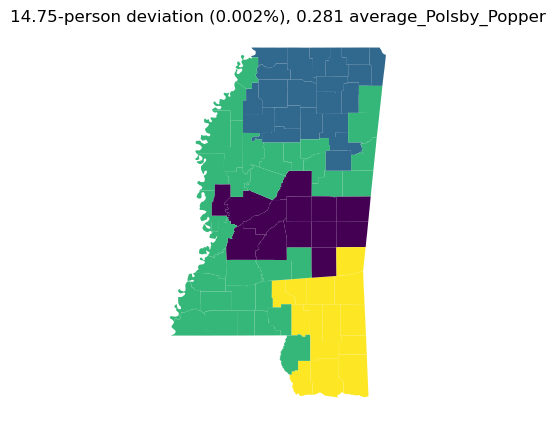

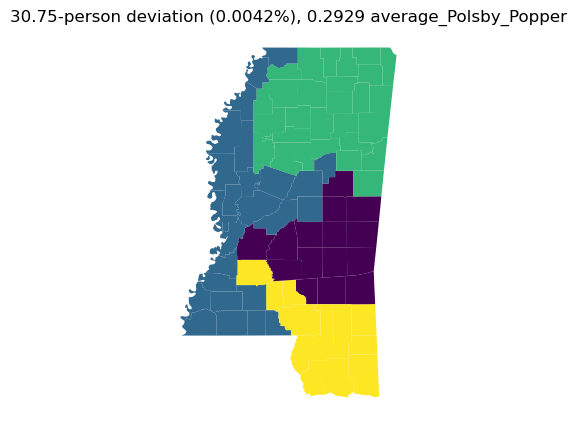

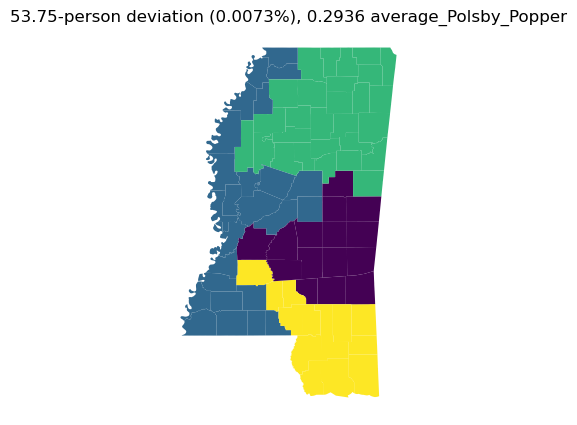

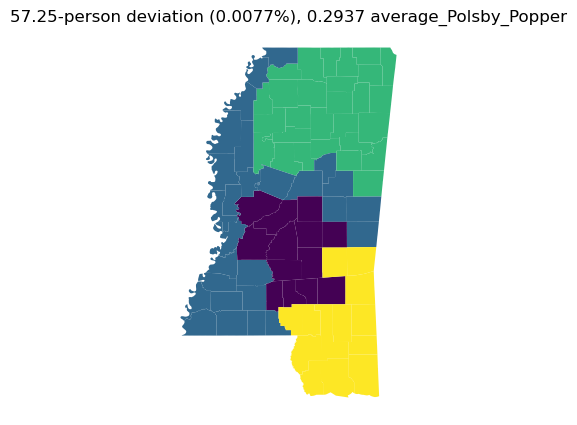

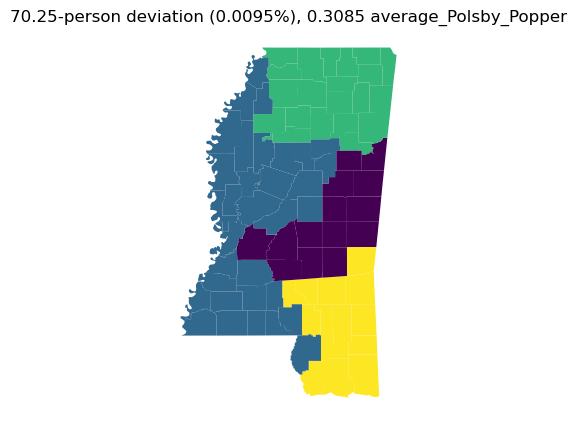

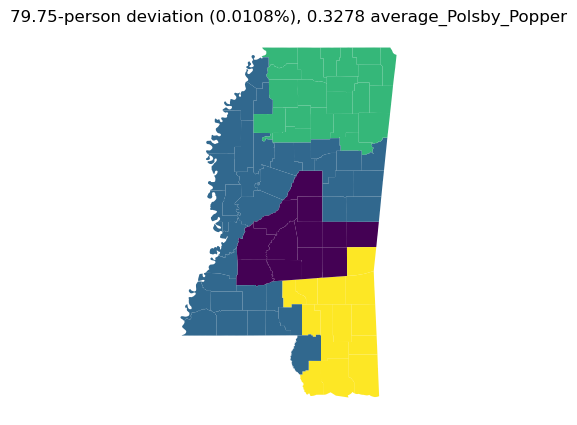

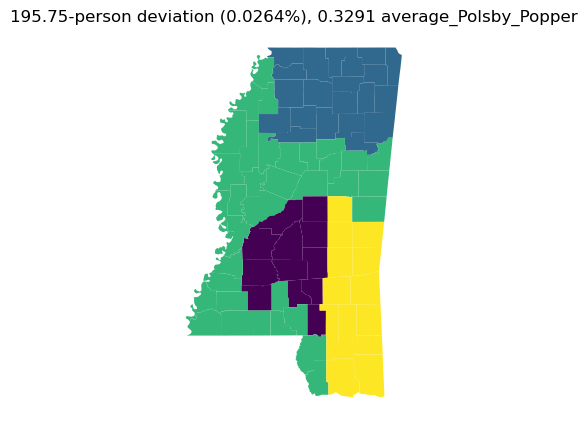

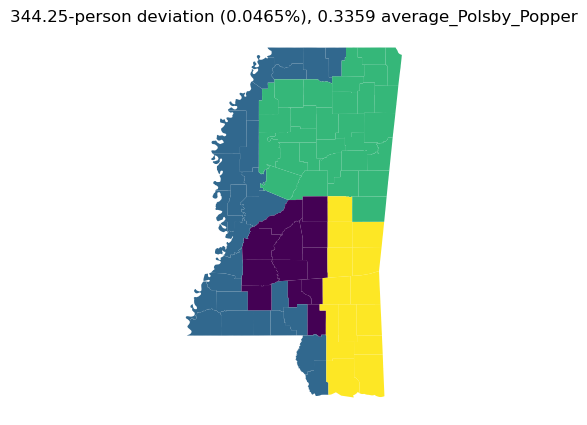

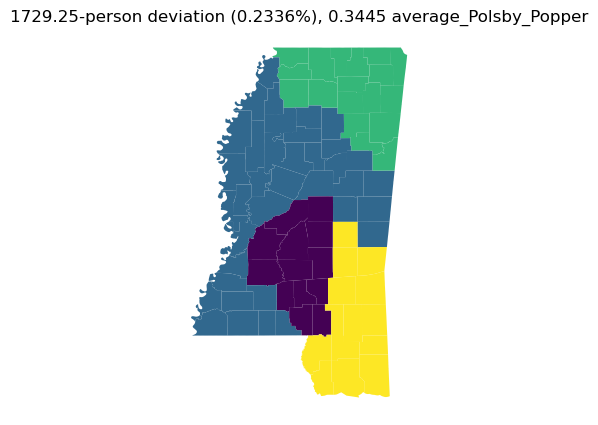

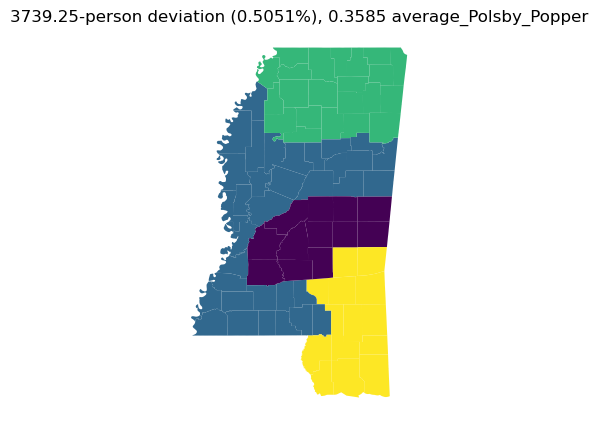

***************************************
obj_type = bottleneck_Polsby_Popper
***************************************
Pareto front objective values: [[0.75, 0.11650901213447952], [2.25, 0.14192477726681813], [3.25, 0.14409516297121716], [4.25, 0.15921324312564752], [15.25, 0.1621450323278614], [16.75, 0.1741097599019085], [75.25, 0.18021647101791144], [75.25, 0.18021647101791144], [75.25, 0.18021647101791144], [75.25, 0.18021647101791144], [75.25, 0.18021647101791144], [98.75, 0.199196764115042], [174.25, 0.20679808352607965], [598.25, 0.20944371738188075], [1020.75, 0.21477759226153806], [1518.75, 0.22725514072690908], [3577.25, 0.2342132364646028], [3577.25, 0.2342132364646028], [3577.25, 0.2342132364646028], [3577.25, 0.2342132364646028], [3577.25, 0.2342132364646028], [3577.25, 0.2342132364646028], [3577.25, 0.2342132364646028], [4088.75, 0.23828810099028566]]


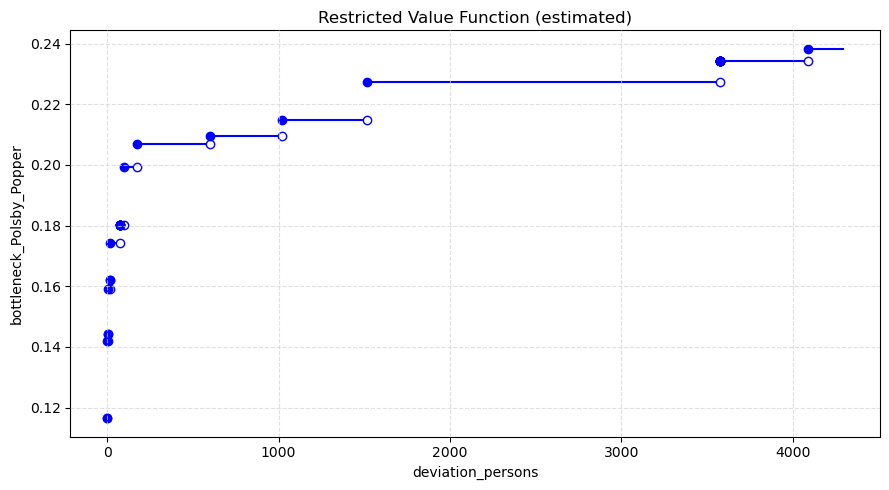

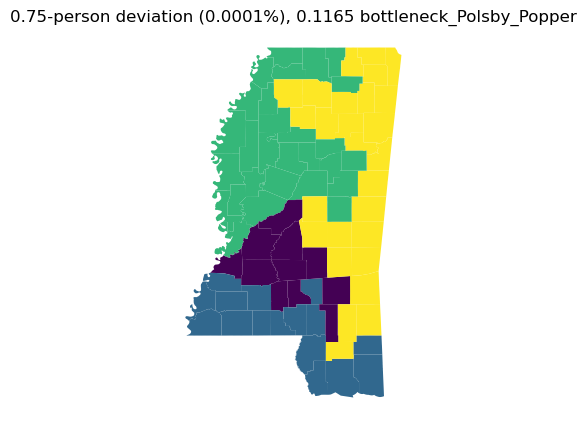

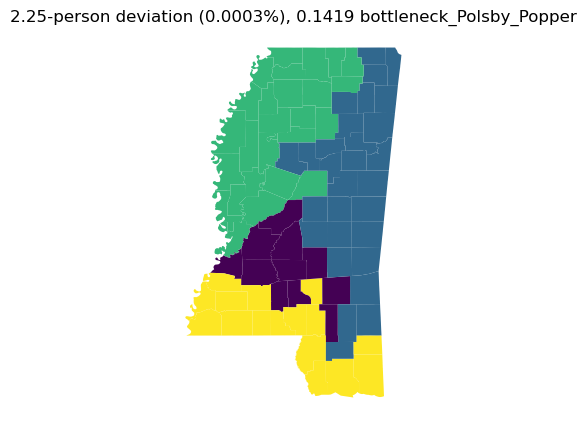

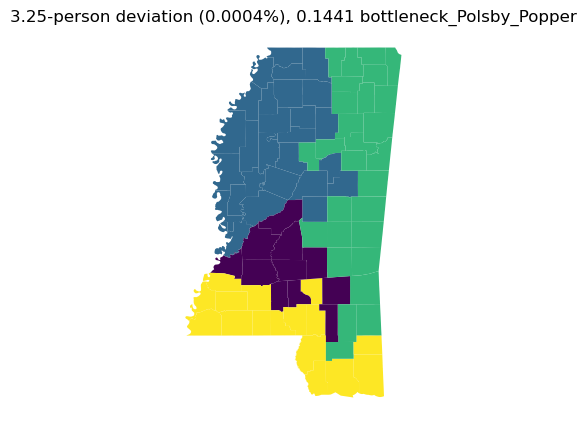

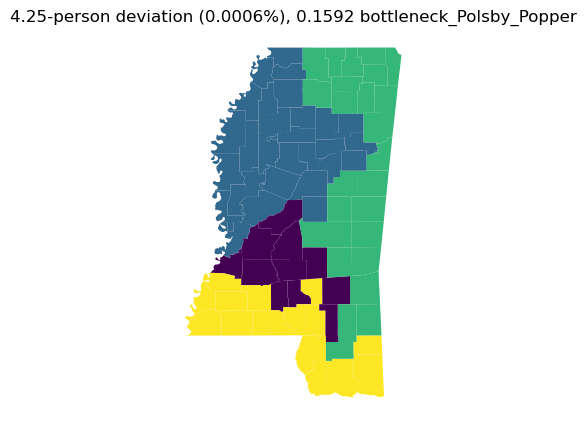

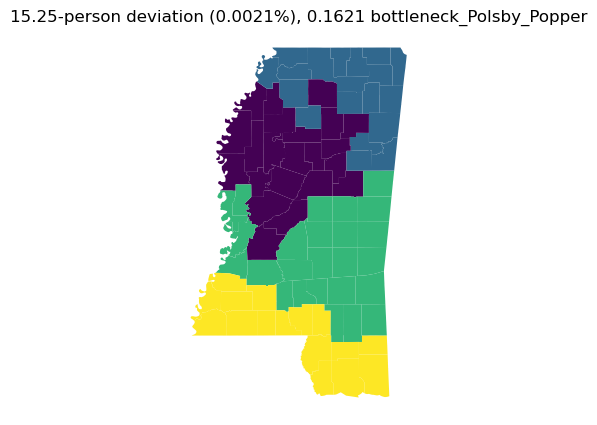

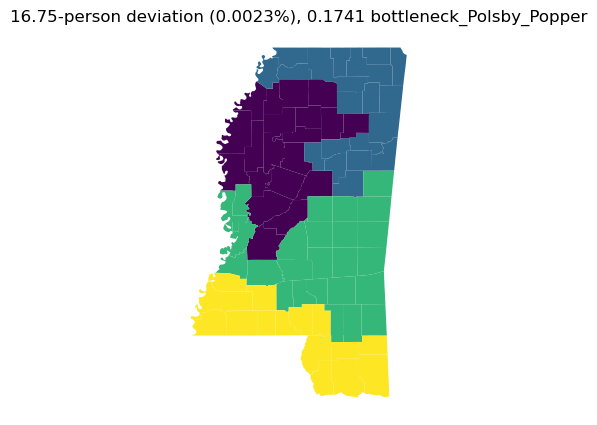

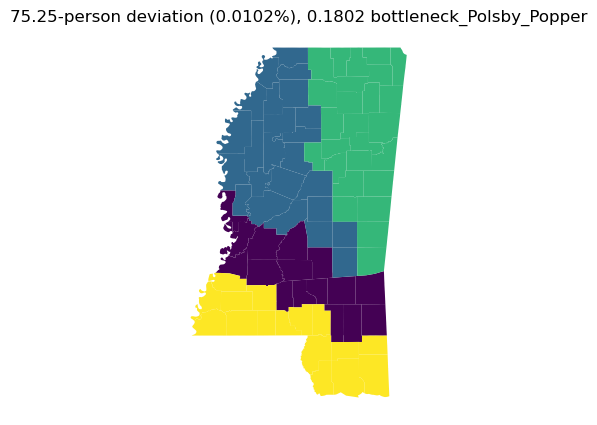

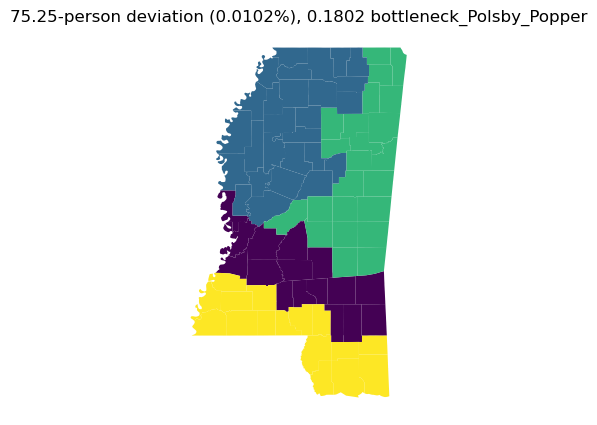

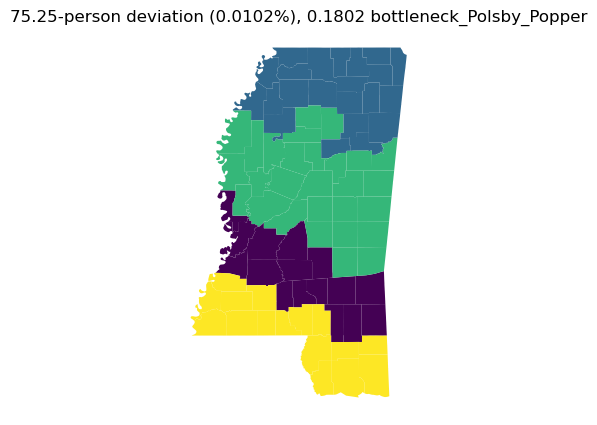

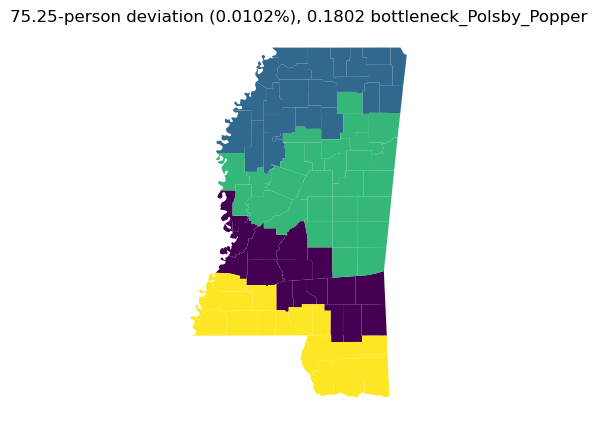

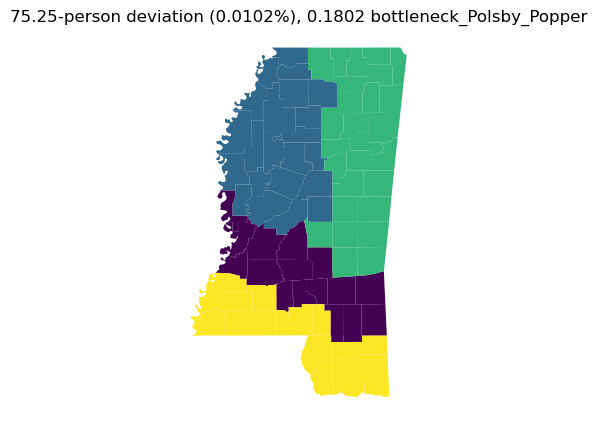

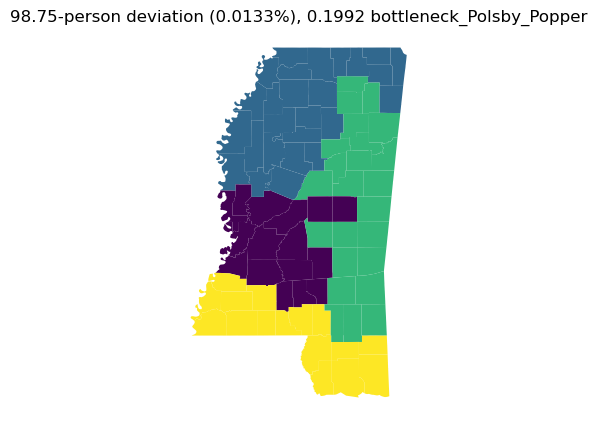

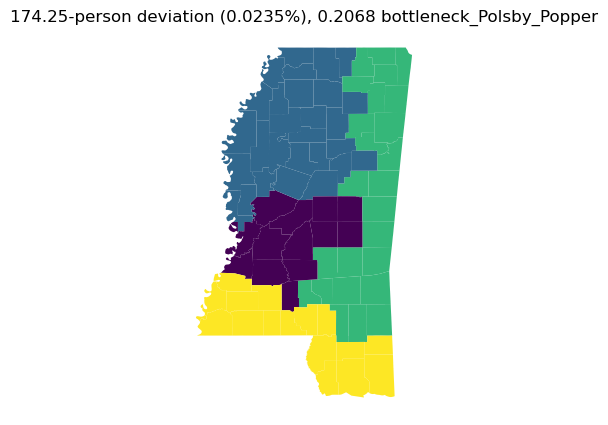

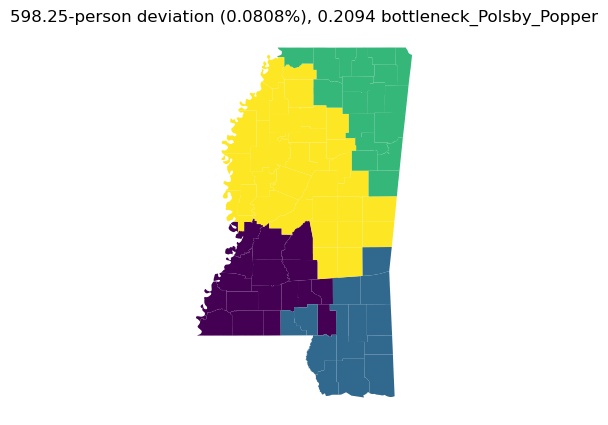

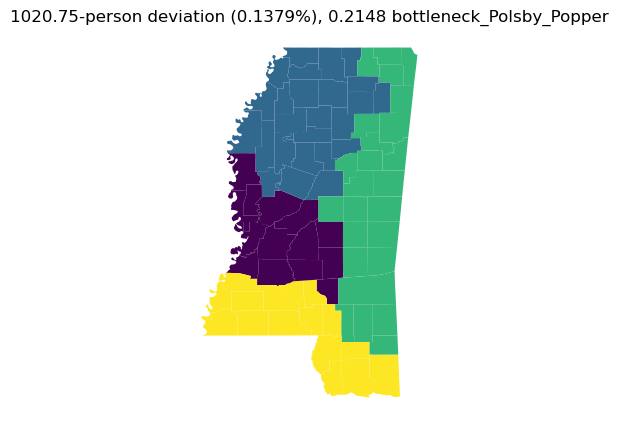

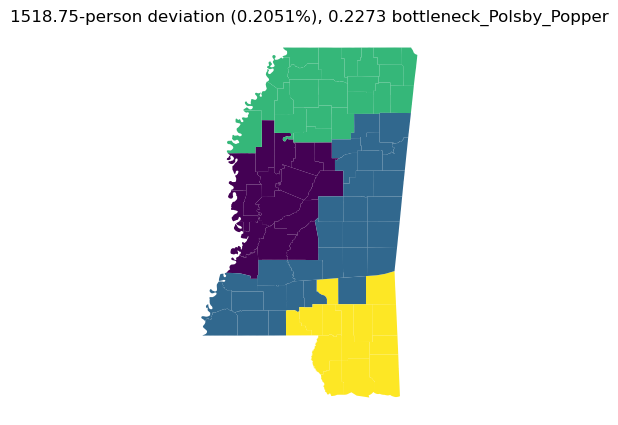

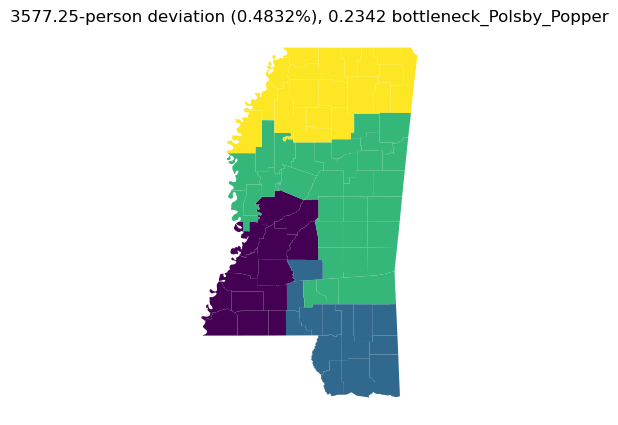

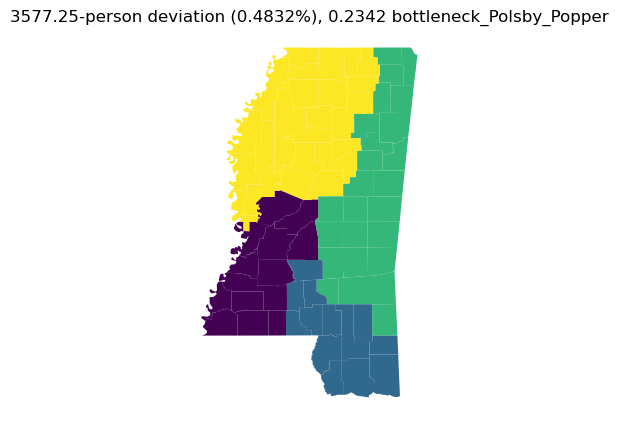

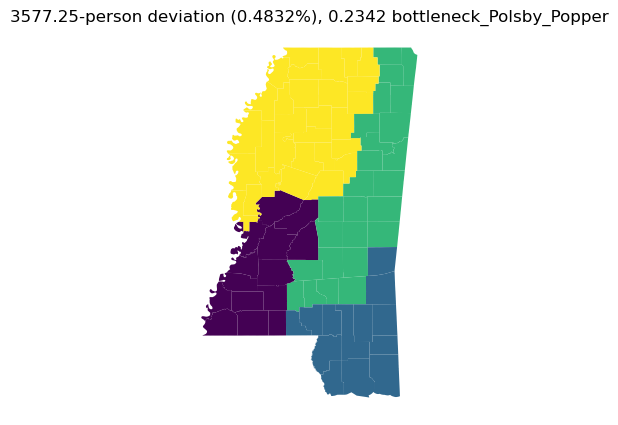

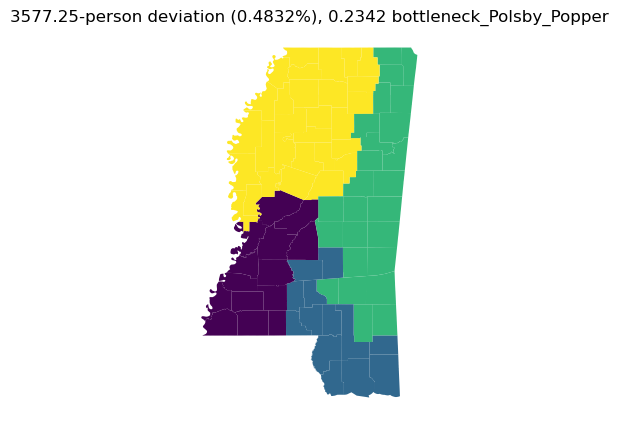

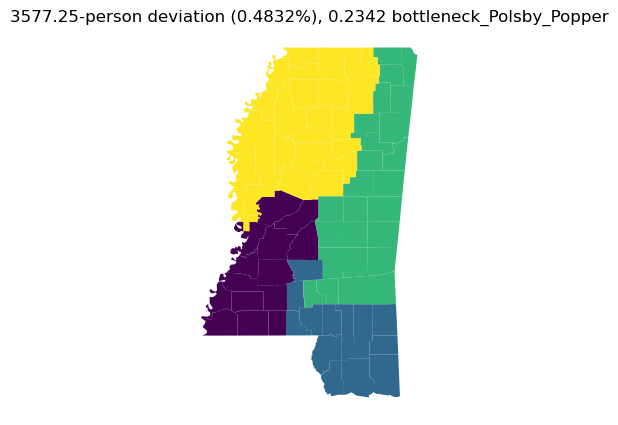

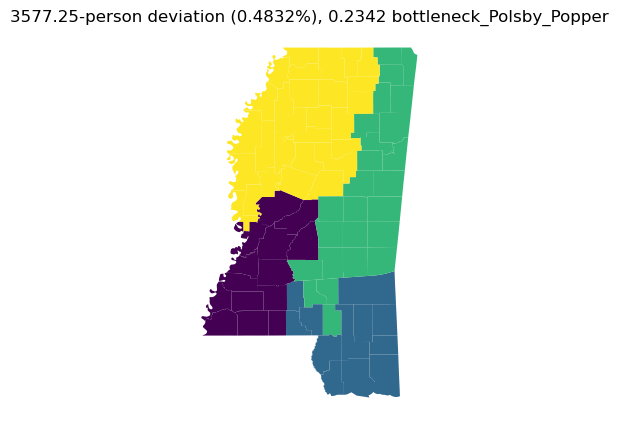

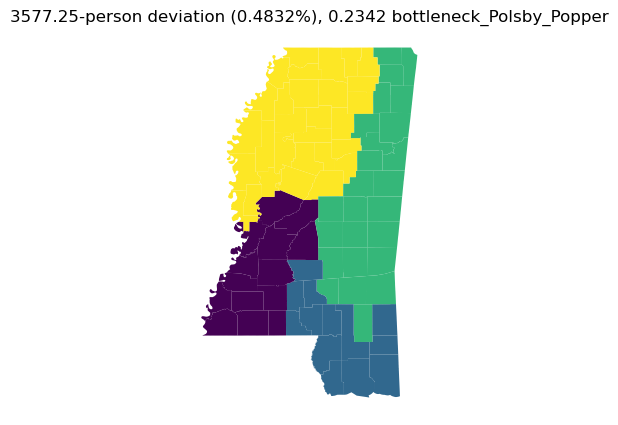

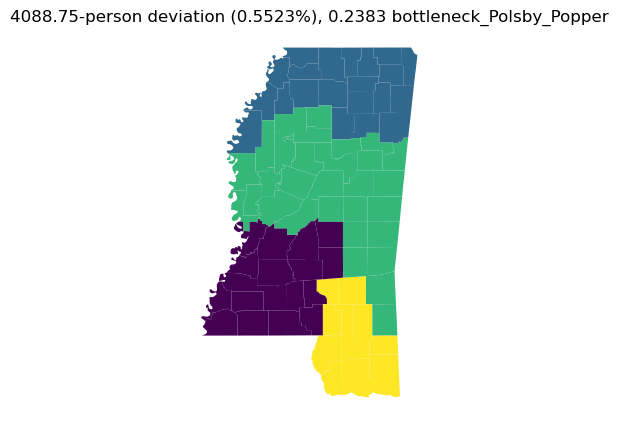

In [5]:
from pareto import ParetoFrontier
from metrics import *
from draw import draw_plan
filepath = 'C:\\districting-data-2020\\'
filename = state + '_county.shp'

# set dummy values... (because compute_obj checks plan feasibility...)
G._L = 0 
G._U = k * ideal_population
pareto = dict()

obj_types = ['cut_edges', 'perimeter', 'inverse_Polsby_Popper', 'average_Polsby_Popper', 'bottleneck_Polsby_Popper']

for obj_type in obj_types:

    print("***************************************")
    print("obj_type =", obj_type)
    print("***************************************")
    
    senses = ['min', 'max' if obj_type in ['average_Polsby_Popper', 'bottleneck_Polsby_Popper'] else 'min']
    obj_names = ['deviation_persons', obj_type]
    pareto[obj_type] = ParetoFrontier(senses, obj_names, state=state, level='county')
    
    for plan in plans:  
        dev = observed_deviation_persons(G, plan, ideal_population)
        obj = compute_obj(G, plan, obj_type)
        objval = [dev, obj]      
        
        # Add the plan and its objective values to the Pareto frontier
        pareto[obj_type].add_plan(plan, objval)
                
    # Print the Pareto frontier plans and objective values
    #print("Pareto front plans:", pareto[obj_type].plans)
    print("Pareto front objective values:", pareto[obj_type].objvals)
    
    # Set the limits accordingly
    pareto[obj_type].plot()   

    # Draw the plans from Pareto frontier
    pareto[obj_type].draw_plans()

In [6]:
print("plans =",plans)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [7]:
len(plans)

41897

In [8]:
for obj_type in obj_types:

    print("***************************************")
    print("obj_type =", obj_type)
    print("***************************************")
    
    senses = ['min', 'max' if obj_type in ['average_Polsby_Popper', 'bottleneck_Polsby_Popper'] else 'min']
    obj_names = ['deviation_persons', obj_type]
    pareto[obj_type] = ParetoFrontier(senses, obj_names, state=state, level='county')
    
    for plan in plans:  
        dev = observed_deviation_persons(G, plan, ideal_population)
        obj = compute_obj(G, plan, obj_type)
        objval = [dev, obj]      
        
        # Add the plan and its objective values to the Pareto frontier
        pareto[obj_type].add_plan(plan, objval)
                
    # Print the Pareto frontier plans and objective values
    print("Pareto front plans:", pareto[obj_type].plans)

***************************************
obj_type = cut_edges
***************************************
Pareto front plans: [[[4, 8, 13, 14, 38, 40, 43, 45, 70, 73, 75], [0, 7, 11, 12, 21, 22, 28, 31, 35, 36, 42, 54, 58, 63, 76, 77], [1, 6, 9, 23, 24, 25, 26, 30, 33, 37, 39, 44, 47, 48, 52, 55, 56, 60, 61, 62, 68, 71, 78], [2, 3, 5, 10, 15, 16, 17, 18, 19, 20, 27, 29, 32, 34, 41, 46, 49, 50, 51, 53, 57, 59, 64, 65, 66, 67, 69, 72, 74, 79, 80, 81]], [[4, 8, 13, 14, 38, 40, 43, 45, 70, 73, 75], [1, 6, 10, 15, 16, 18, 26, 29, 30, 32, 33, 37, 41, 44, 46, 47, 49, 53, 55, 57, 60, 61, 64, 67, 72, 74, 78, 79, 81], [2, 3, 5, 9, 17, 19, 20, 23, 24, 25, 27, 34, 39, 48, 50, 51, 52, 56, 59, 62, 65, 66, 68, 69, 71, 80], [0, 7, 11, 12, 21, 22, 28, 31, 35, 36, 42, 54, 58, 63, 76, 77]], [[4, 8, 13, 14, 38, 40, 43, 45, 70, 73, 75], [2, 3, 5, 10, 15, 17, 19, 20, 23, 25, 27, 29, 34, 39, 46, 50, 51, 57, 59, 64, 65, 66, 67, 68, 69, 71, 74, 79, 80], [0, 7, 11, 12, 21, 22, 28, 31, 35, 36, 42, 54, 58, 63, 76, 77]